In [1]:
import math
import pandas as pd
import tensorflow as tf
# import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
np.random.seed(0)
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
from tensorflow.keras import initializers

In [2]:
x_test_scaled = pd.read_csv('260_sample_test_scaled.csv').set_index("Patient_ID")
# x_test_scaled = x_test_scaled.set_index("Patient_ID")
x_test_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [3]:
test_set = x_test_scaled.copy()

In [4]:
sh = test_set.head(1).shape

In [5]:
sh

(1, 219)

In [6]:
# hundred = pd.read_csv('260_sample_test.csv')
# hundred = hundred.set_index("Patient_ID")
# hundred

In [7]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

from keras.optimizers import Adam, SGD, Adadelta

# change to load .h5

# class AutoEncoder(Model):

#     def __init__(self, n_inputs, init_fn, n_bottleneck=32):

#         super().__init__()

#         self.encoder = Sequential(
#             [

#                 Input(shape=(n_inputs,)),
#                 # encoder level 1
#                 Dense(n_inputs*2),
#                 BatchNormalization(),
#                 LeakyReLU(),
#                 # encoder level 2
#                 Dense(n_inputs),
#                 BatchNormalization(),
#                 LeakyReLU(),
#                 # bottleneck
#                 Dense(n_bottleneck)
#             ]
#         )



#     def call(self, inputs):

#         encoded = self.encoder(inputs)
#         return encoded
    
n_inputs = 219
n_bottleneck = 32
encoder = Sequential(
            [

#                 Input(shape=(n_inputs,)),
                # encoder level 1
                Dense(n_inputs*2),
                BatchNormalization(),
                LeakyReLU(),
                # encoder level 2
                Dense(n_inputs),
                BatchNormalization(),
                LeakyReLU(),
                # bottleneck
                Dense(n_bottleneck)
            ]
        )

In [8]:
# n_bottleneck = 32
# initializer = tf.keras.initializers.GlorotUniform()
# auto_encoder = AutoEncoder(219,initializer, n_bottleneck)

In [9]:
# auto_encoder.encoder.load_weights("encoder_ckpt")
encoder.load_weights("encoder_ckpt")

In [10]:
encoder.build(sh) 
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 438)                  96360     
                                                                 
 batch_normalization (BatchN  (1, 438)                 1752      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (1, 438)                  0         
                                                                 
 dense_1 (Dense)             (1, 219)                  96141     
                                                                 
 batch_normalization_1 (Batc  (1, 219)                 876       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (1, 219)                  0

In [11]:
# auto_encoder.encoder.summary()

In [12]:
def encode_dataset(encoder, dataset):
    latent_var = np.arange(32)
    recon = encoder(dataset.values)
    r = pd.DataFrame(recon, columns=latent_var, index=dataset.index)
    return r
    
tsne_dataset = encode_dataset(encoder, test_set)

## Labels

In [13]:
patient_ids = np.array(tsne_dataset.index)
patient_ids

array(['253_CD_plain', '105_CD_plain', '2_CD_plain', '184_CD_plain',
       '312_CD_plain', '271_CD_plain', '62_CD_deep_ulcer',
       '167_CD_deep_ulcer', '196_CD_deep_ulcer', '34_control',
       '23_CD_deep_ulcer', '58_CD_plain', '197_CD_plain',
       '93_CD_deep_ulcer', '229_CD_deep_ulcer', '293_CD_plain',
       '192_CD_plain', '52_CD_plain', '46_CD_deep_ulcer', '268_CD_plain',
       '176_CD_deep_ulcer', '228_CD_plain', '215_CD_plain',
       '307_CD_plain', '49_CD_deep_ulcer', '183_CD_deep_ulcer',
       '191_CD_plain', '270_CD_plain', '41_control', '78_control',
       '50_CD_deep_ulcer', '236_CD_deep_ulcer', '206_CD_plain',
       '19_control', '211_CD_plain', '47_CD_plain', '262_CD_plain',
       '82_control', '161_CD_plain', '137_CD_plain', '180_control',
       '260_CD_deep_ulcer', '134_CD_plain', '289_CD_plain',
       '314_CD_plain', '177_CD_deep_ulcer', '212_CD_deep_ulcer',
       '118_control', '112_CD_plain', '132_CD_plain', '40_CD_plain',
       '230_CD_deep_ulcer', 

In [14]:
def classify(x):
    if "_control" in x: # control
        return 0
    elif "CD_plain" in x: # Crohn's Disease no deep ulcer
#         print(x)
        return 1
    elif "CD_deep_ulcer" in x: # Crohn's Disease deep ulcer
#         print(x)
        return 2
    else:
        return 3 # Ulcerative Collitis

vec = np.vectorize(classify)

disease_labels = vec(patient_ids)
disease_labels

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2])

## tSNE plots

In [15]:
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [16]:
no_IBD = disease_labels == 0
CD_no_ulcer = disease_labels == 1
CD_deep_ulcer = disease_labels == 2
UC = disease_labels == 3

In [17]:
no_IBD.shape

(78,)

In [18]:
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,2.032309,-5.135555,1.631054,3.089864,-0.130211,1.283602,1.409903,-0.000868,-1.457192,0.391495,...,-0.214097,2.967697,1.526739,2.786917,8.452328,-0.794451,1.746855,5.542357,2.547924,7.801789
105_CD_plain,2.576689,-2.340752,0.555628,0.613485,1.678985,0.318563,0.406789,1.376645,-0.395139,-0.791841,...,-0.344940,1.488305,0.435154,-0.177925,3.366642,-1.392990,1.068992,3.780588,2.048558,2.499993
2_CD_plain,-6.054844,2.469419,0.006588,5.369420,-2.754896,-0.186449,-0.318684,-2.523620,3.494761,4.088428,...,-0.468243,-5.724041,5.221141,4.328642,-8.917670,6.238849,-1.733903,-8.196208,-4.708192,1.058727
184_CD_plain,0.687100,0.524452,0.269079,-2.052216,0.444426,-0.840710,-0.785240,0.981180,-0.338528,-1.283728,...,0.616811,0.678319,-0.455934,-1.772873,-1.381696,-0.739447,-0.837508,1.542518,0.079764,-2.338043
312_CD_plain,-0.094131,-0.576040,1.251028,-0.192213,-0.912040,0.211954,-0.935722,0.105053,-0.823305,-0.700169,...,0.691425,1.502194,0.730477,0.222934,1.692135,-0.627146,0.753498,0.908899,0.217039,0.918757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,-0.692460,0.563372,1.358234,-0.532380,-0.864549,0.263345,-0.669010,0.024876,0.254361,0.342033,...,0.674746,1.629165,0.967041,0.651328,2.133363,-0.493894,0.755310,0.137140,0.194016,1.777632
279_CD_plain,-5.111883,3.060499,0.330828,4.150625,-1.680177,0.798668,-0.645254,-2.560623,1.637389,3.765302,...,-0.231179,-4.290086,4.050075,5.392345,-6.340455,5.593947,2.031589,-8.215998,-3.556630,2.185153
179_CD_plain,0.475798,-0.982805,1.504499,0.194518,-0.596799,0.415968,-0.858169,0.237164,-0.880746,-0.611315,...,0.158961,2.484211,1.018860,0.139997,3.362733,-1.407725,0.593724,1.642781,-0.040300,1.737715


dataset size: (78, 32)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

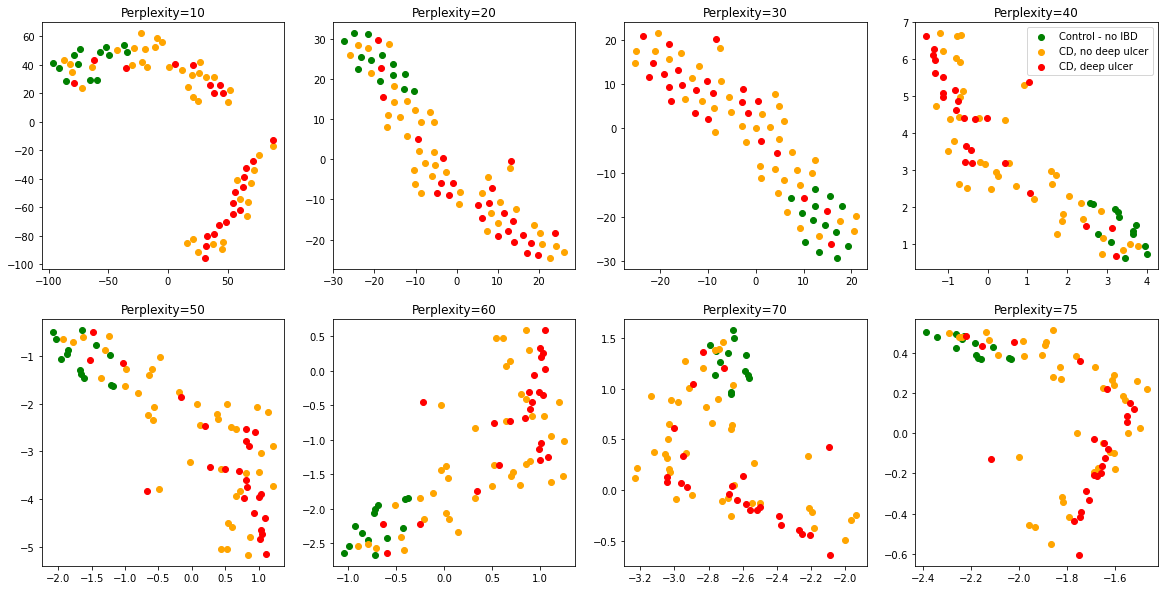

In [19]:
def plot_tsne(tsne_dataset, selected_patient_idx=None):
    n_samples = 78
    n_components = 2
    print("dataset size:",tsne_dataset.shape)

    (fig, subplots) = plt.subplots(2, 4, figsize=(20, 10))
    perplexities = [10, 20, 30, 40]

    for i, perplexity in enumerate(perplexities):
        ax = subplots[0][i]

        t0 = time()
        tsne = manifold.TSNE(
            n_components=n_components,
            init="random",
            random_state=0,
            perplexity=perplexity,
            n_iter=750,
            method='exact'
        )
        Y = tsne.fit_transform(tsne_dataset)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[no_IBD, 0], Y[no_IBD, 1], c="g", label="Control - no IBD")
        ax.scatter(Y[CD_no_ulcer, 0], Y[CD_no_ulcer, 1], c="orange", label="CD, no deep ulcer")
        ax.scatter(Y[CD_deep_ulcer, 0], Y[CD_deep_ulcer, 1], c="r", label="CD, deep ulcer")
        
        if selected_patient_idx is not None:
            ax.scatter(Y[selected_patient_idx, 0], Y[selected_patient_idx, 1], c="cyan", s=500, marker='*',edgecolor='black', linewidth=.7, label="Selected patient")
    #     ax.scatter(Y[UC, 0], Y[UC, 1], c="brown", label="UC")

        if i == 3:
            ax.legend()

        ax.axis("tight")

    perplexities = [50, 60, 70, 75]
    for i, perplexity in enumerate(perplexities):
        ax = subplots[1][i]

        t0 = time()
        tsne = manifold.TSNE(
            n_components=n_components,
            init="random",
            random_state=0,
            perplexity=perplexity,
            n_iter=1000,
            method='exact'
        )
        Y = tsne.fit_transform(tsne_dataset)
        t1 = time()
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[no_IBD, 0], Y[no_IBD, 1], c="g")
        ax.scatter(Y[CD_no_ulcer, 0], Y[CD_no_ulcer, 1], c="orange")
        ax.scatter(Y[CD_deep_ulcer, 0], Y[CD_deep_ulcer, 1], c="r")
        
        if selected_patient_idx is not None:
            ax.scatter(Y[selected_patient_idx, 0], Y[selected_patient_idx, 1], c="cyan", s=500, marker='*',edgecolor='black', linewidth=.7, label="Selected patient")
    #     ax.scatter(Y[UC, 0], Y[UC, 1], c="brown", label="UC")

        ax.axis("tight")

plot_tsne(tsne_dataset)

# Class contrastive explainability

## Gene expression distributions of test set (post scaling)

In [20]:
# tsne_dataset

In [21]:
hundred_control = x_test_scaled.loc[x_test_scaled.index.str.endswith('_control')]
hundred_CD_plain = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_plain')]
hundred_CD_deep_ulcer = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_deep_ulcer')]
datasets = [hundred_control, hundred_CD_plain, hundred_CD_deep_ulcer]
labels = ["Control", "Crohn's Disease", "Crohn's Disease Deep Ulcer"]
colours = ["green", "orange", "red"]

In [22]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import math

# for gene_symbol in hundred_control.columns:
#     for i in range(len(datasets)):
#         ds = datasets[i]
#         label = labels[i]
#         colour = colours[i]
#         vals = ds[gene_symbol].values
#         gene_stats = ds.describe()
#         g_mean = gene_stats.loc["mean", gene_symbol]
#         g_std = gene_stats.loc["std", gene_symbol]
#         g_min = gene_stats.loc["min", gene_symbol]
#         g_max = gene_stats.loc["max", gene_symbol]

#         mu = g_mean
#         variance = g_std**2
#         sigma = math.sqrt(variance)
#         x = np.linspace(g_min, g_max, 100)
#         plt.plot(x, stats.norm.pdf(x, mu, sigma), label=label, c=colour)

#         if i<4:
#             plt.hist(vals, bins=25, density=True, alpha=0.6, color=colour)
#     plt.title(gene_symbol+" Distributions")
#     plt.xlabel('Gene expression (FPKM)')
#     plt.ylabel('Probability density')
#     plt.legend()
#     plt.show()

## CD Deep Ulcer patient

In [23]:
test_set = x_test_scaled.copy()
test_set

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [24]:
# pid = '212_CD_deep_ulcer'
def get_patient(symptom, frac=2):
    poss_patients = test_set.loc[test_set.index.str.endswith(symptom)]
    print(len(poss_patients),"possible")
    selected_patient = poss_patients.iloc[[len(poss_patients)//frac]]
    pid = selected_patient.index[0]
    return selected_patient, pid

selected_patient, pid = get_patient('CD_deep_ulcer')
selected_patient

24 possible


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


In [25]:
pid

'260_CD_deep_ulcer'

In [26]:
ind = tsne_dataset.index
selected_patient_idx = ind.get_loc(pid)


dataset size: (78, 32)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

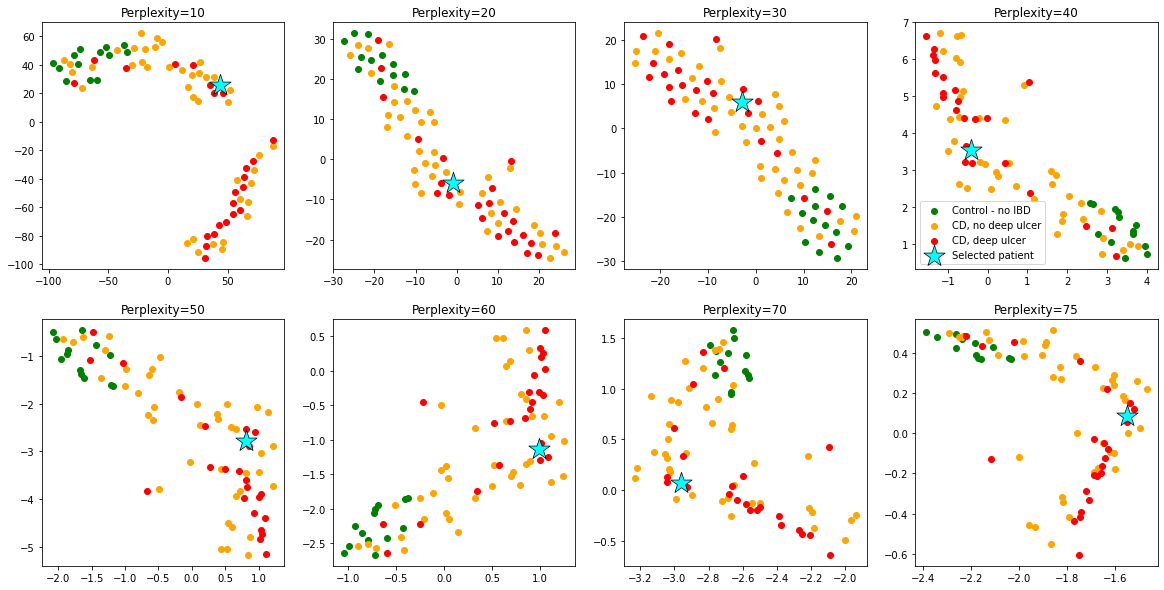

In [27]:


plot_tsne(tsne_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 60 genes

In [28]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

# selected_patient, pid = get_patient('CD_deep_ulcer')
# selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


In [29]:
with open("most_diff_genes_60", "rb") as fp:   # Unpickling
    most_diff_genes_60 = pickle.load(fp)

In [31]:
def modify_expression(pid, most_diff_genes, dataset):
    print("dataset size (should be test):",dataset.shape)
    controls = dataset.loc[dataset.index.str.endswith('_control')]
#     plains = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_plain')]
#     ulcers = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_deep_ulcer')]
    
    for gene_symbol in most_diff_genes:
        new_val = controls.describe().loc["mean", gene_symbol]
        dataset.loc[dataset.index.str.startswith(pid), gene_symbol] = new_val
    return dataset



In [32]:
test_set.columns

Index(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6', 'CEACAM7',
       'CHI3L1', 'ABCC2',
       ...
       'TAF15', 'ZFYVE20', 'LOC100420253', 'LY6G5B', 'C5orf58', 'RSL24D1P1',
       'MIEN1', 'PCBP1_AS1', 'LOC100133165', 'DNAJB8'],
      dtype='object', length=219)

In [33]:
test_set = modify_expression(pid, most_diff_genes_60, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.837271,0.625309,0.800854,0.834515,0.740914,0.578012,0.638968,0.173455,0.313654,0.836045,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


## Re-encoding the dataset

In [34]:
tsne_dataset = encode_dataset(encoder, test_set)
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,2.032309,-5.135555,1.631054,3.089864,-0.130211,1.283602,1.409903,-0.000868,-1.457192,0.391495,...,-0.214097,2.967697,1.526739,2.786917,8.452328,-0.794451,1.746855,5.542357,2.547924,7.801789
105_CD_plain,2.576689,-2.340752,0.555628,0.613485,1.678985,0.318563,0.406789,1.376645,-0.395139,-0.791841,...,-0.344940,1.488305,0.435154,-0.177925,3.366642,-1.392990,1.068992,3.780588,2.048558,2.499993
2_CD_plain,-6.054844,2.469419,0.006588,5.369420,-2.754896,-0.186449,-0.318684,-2.523620,3.494761,4.088428,...,-0.468243,-5.724041,5.221141,4.328642,-8.917670,6.238849,-1.733903,-8.196208,-4.708192,1.058727
184_CD_plain,0.687100,0.524452,0.269079,-2.052216,0.444426,-0.840710,-0.785240,0.981180,-0.338528,-1.283728,...,0.616811,0.678319,-0.455934,-1.772873,-1.381696,-0.739447,-0.837508,1.542518,0.079764,-2.338043
312_CD_plain,-0.094131,-0.576040,1.251028,-0.192213,-0.912040,0.211954,-0.935722,0.105053,-0.823305,-0.700169,...,0.691425,1.502194,0.730477,0.222934,1.692135,-0.627146,0.753498,0.908899,0.217039,0.918757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,-0.692460,0.563372,1.358234,-0.532380,-0.864549,0.263345,-0.669010,0.024876,0.254361,0.342033,...,0.674746,1.629165,0.967041,0.651328,2.133363,-0.493894,0.755310,0.137140,0.194016,1.777632
279_CD_plain,-5.111883,3.060499,0.330828,4.150625,-1.680177,0.798668,-0.645254,-2.560623,1.637389,3.765302,...,-0.231179,-4.290086,4.050075,5.392345,-6.340455,5.593947,2.031589,-8.215998,-3.556630,2.185153
179_CD_plain,0.475798,-0.982805,1.504499,0.194518,-0.596799,0.415968,-0.858169,0.237164,-0.880746,-0.611315,...,0.158961,2.484211,1.018860,0.139997,3.362733,-1.407725,0.593724,1.642781,-0.040300,1.737715


## Replot tSNE

dataset size: (78, 32)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

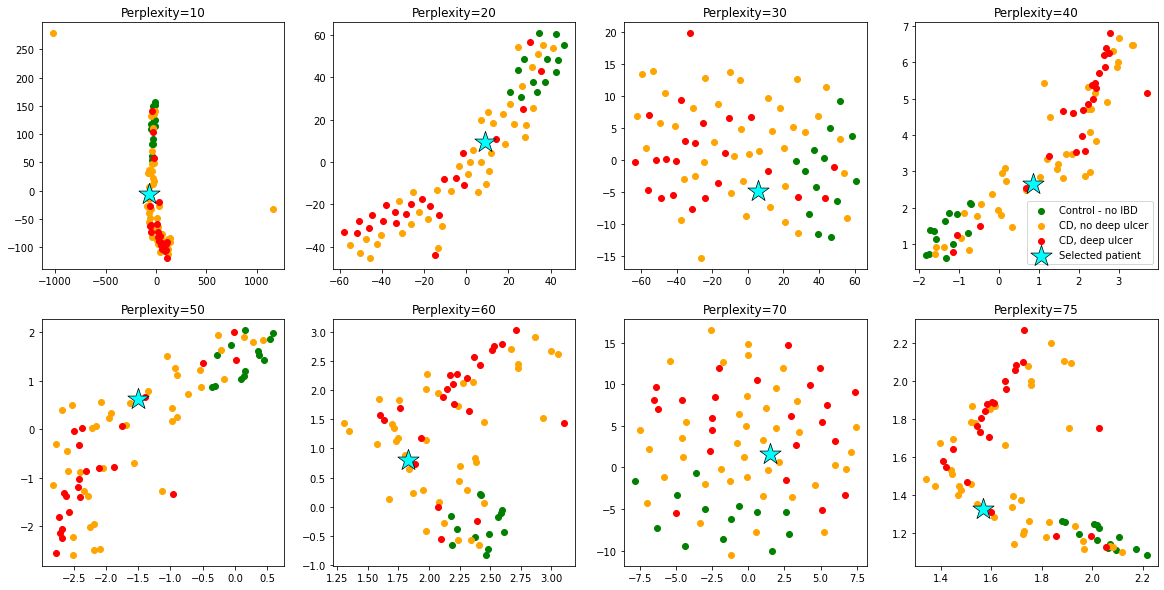

In [35]:


plot_tsne(tsne_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 120 genes

In [36]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


In [37]:

# selected_patient = tsne_dataset.loc[tsne_dataset.index.str.startswith(pid)]
# selected_patient

In [38]:
with open("most_diff_genes_115", "rb") as fp:   # Unpickling
    most_diff_genes = pickle.load(fp)

most_diff_genes

['FDCSP', 'FNDC4', 'JKAMP', 'RUFY4']

In [39]:
test_set = modify_expression(pid, most_diff_genes, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


## Re-encoding the dataset

In [40]:
tsne_dataset = encode_dataset(encoder, test_set)
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,2.032309,-5.135555,1.631054,3.089864,-0.130211,1.283602,1.409903,-0.000868,-1.457192,0.391495,...,-0.214097,2.967697,1.526739,2.786917,8.452328,-0.794451,1.746855,5.542357,2.547924,7.801789
105_CD_plain,2.576689,-2.340752,0.555628,0.613485,1.678985,0.318563,0.406789,1.376645,-0.395139,-0.791841,...,-0.344940,1.488305,0.435154,-0.177925,3.366642,-1.392990,1.068992,3.780588,2.048558,2.499993
2_CD_plain,-6.054844,2.469419,0.006588,5.369420,-2.754896,-0.186449,-0.318684,-2.523620,3.494761,4.088428,...,-0.468243,-5.724041,5.221141,4.328642,-8.917670,6.238849,-1.733903,-8.196208,-4.708192,1.058727
184_CD_plain,0.687100,0.524452,0.269079,-2.052216,0.444426,-0.840710,-0.785240,0.981180,-0.338528,-1.283728,...,0.616811,0.678319,-0.455934,-1.772873,-1.381696,-0.739447,-0.837508,1.542518,0.079764,-2.338043
312_CD_plain,-0.094131,-0.576040,1.251028,-0.192213,-0.912040,0.211954,-0.935722,0.105053,-0.823305,-0.700169,...,0.691425,1.502194,0.730477,0.222934,1.692135,-0.627146,0.753498,0.908899,0.217039,0.918757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,-0.692460,0.563372,1.358234,-0.532380,-0.864549,0.263345,-0.669010,0.024876,0.254361,0.342033,...,0.674746,1.629165,0.967041,0.651328,2.133363,-0.493894,0.755310,0.137140,0.194016,1.777632
279_CD_plain,-5.111883,3.060499,0.330828,4.150625,-1.680177,0.798668,-0.645254,-2.560623,1.637389,3.765302,...,-0.231179,-4.290086,4.050075,5.392345,-6.340455,5.593947,2.031589,-8.215998,-3.556630,2.185153
179_CD_plain,0.475798,-0.982805,1.504499,0.194518,-0.596799,0.415968,-0.858169,0.237164,-0.880746,-0.611315,...,0.158961,2.484211,1.018860,0.139997,3.362733,-1.407725,0.593724,1.642781,-0.040300,1.737715


## Replot tSNE

dataset size: (78, 32)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

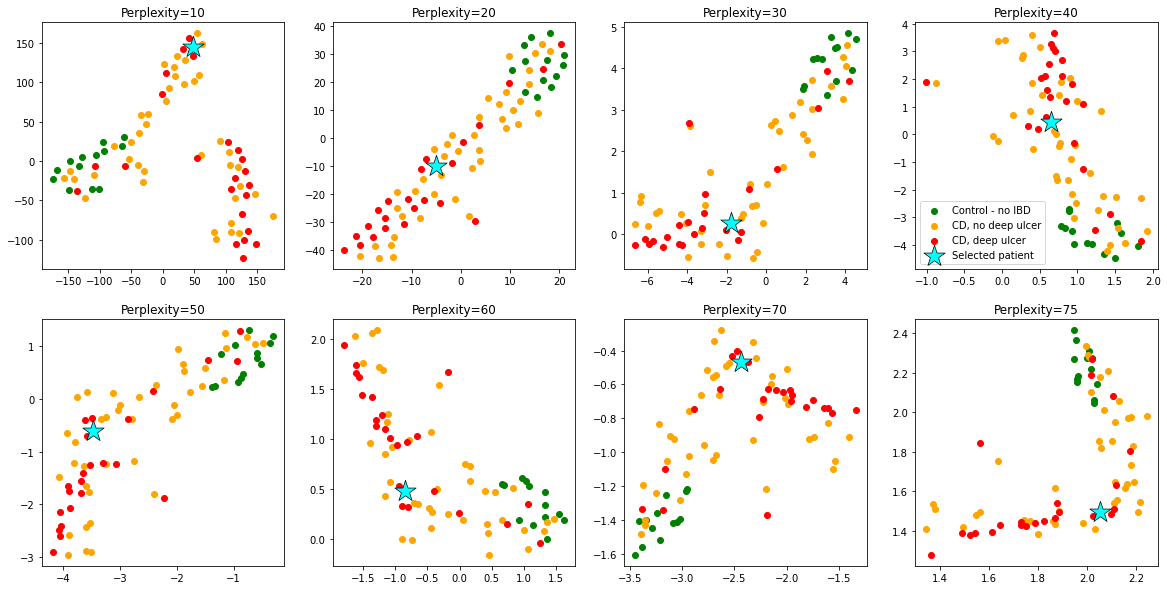

In [41]:


plot_tsne(tsne_dataset, selected_patient_idx)

Patient moves into the control cluster

## CD No Deep Ulcer patient

In [42]:
test_set = x_test_scaled.copy()
test_set

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [43]:


selected_patient, pid = get_patient('CD_plain', 6)
selected_patient

41 possible


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


In [44]:
pid

'58_CD_plain'

In [45]:
ind = tsne_dataset.index
selected_patient_idx = ind.get_loc(pid)


dataset size: (78, 32)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

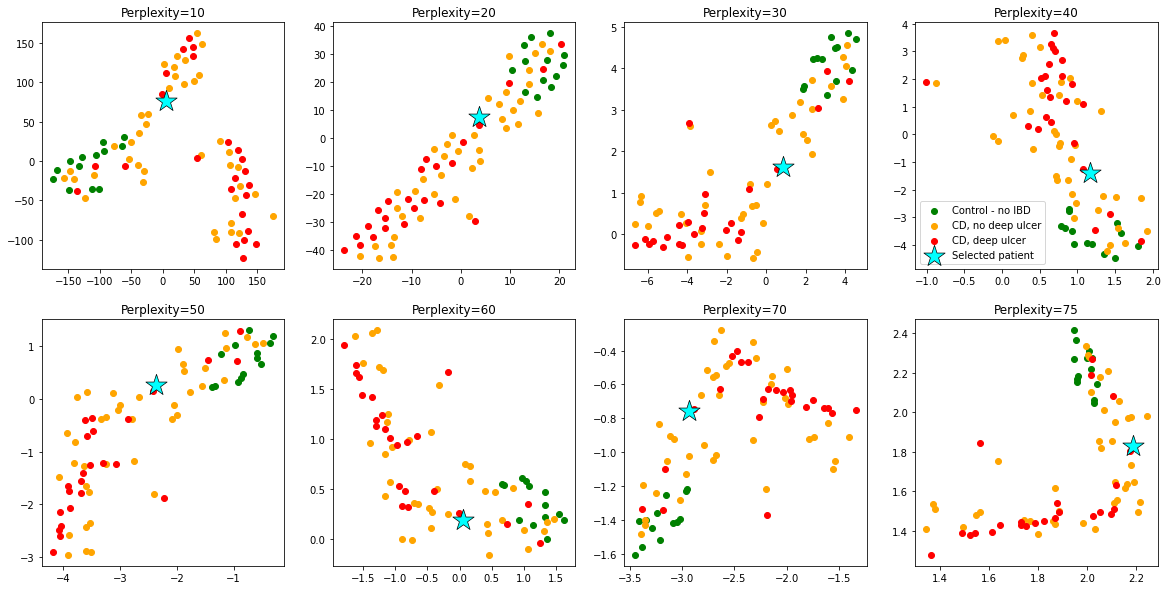

In [46]:


plot_tsne(tsne_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 60 genes

In [47]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

# selected_patient, pid = get_patient('CD_deep_ulcer')
# selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


In [48]:
with open("most_diff_genes_60", "rb") as fp:   # Unpickling
    most_diff_genes_60 = pickle.load(fp)

In [49]:
def modify_expression(pid, most_diff_genes, dataset):
    print("dataset size (should be test):",dataset.shape)
    controls = dataset.loc[dataset.index.str.endswith('_control')]
#     plains = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_plain')]
#     ulcers = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_deep_ulcer')]
    
    for gene_symbol in most_diff_genes:
        new_val = controls.describe().loc["mean", gene_symbol]
        dataset.loc[dataset.index.str.startswith(pid), gene_symbol] = new_val
    return dataset



In [50]:
test_set.columns

Index(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6', 'CEACAM7',
       'CHI3L1', 'ABCC2',
       ...
       'TAF15', 'ZFYVE20', 'LOC100420253', 'LY6G5B', 'C5orf58', 'RSL24D1P1',
       'MIEN1', 'PCBP1_AS1', 'LOC100133165', 'DNAJB8'],
      dtype='object', length=219)

In [51]:
test_set = modify_expression(pid, most_diff_genes_60, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.837271,0.67885,0.800854,0.834515,0.740914,0.498697,0.638968,0.173455,0.313654,0.836045,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


## Re-encoding the dataset

In [52]:
tsne_dataset = encode_dataset(encoder, test_set)
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,2.032309,-5.135555,1.631054,3.089864,-0.130211,1.283602,1.409903,-0.000868,-1.457192,0.391495,...,-0.214097,2.967697,1.526739,2.786917,8.452328,-0.794451,1.746855,5.542357,2.547924,7.801789
105_CD_plain,2.576689,-2.340752,0.555628,0.613485,1.678985,0.318563,0.406789,1.376645,-0.395139,-0.791841,...,-0.344940,1.488305,0.435154,-0.177925,3.366642,-1.392990,1.068992,3.780588,2.048558,2.499993
2_CD_plain,-6.054844,2.469419,0.006588,5.369420,-2.754896,-0.186449,-0.318684,-2.523620,3.494761,4.088428,...,-0.468243,-5.724041,5.221141,4.328642,-8.917670,6.238849,-1.733903,-8.196208,-4.708192,1.058727
184_CD_plain,0.687100,0.524452,0.269079,-2.052216,0.444426,-0.840710,-0.785240,0.981180,-0.338528,-1.283728,...,0.616811,0.678319,-0.455934,-1.772873,-1.381696,-0.739447,-0.837508,1.542518,0.079764,-2.338043
312_CD_plain,-0.094131,-0.576040,1.251028,-0.192213,-0.912040,0.211954,-0.935722,0.105053,-0.823305,-0.700169,...,0.691425,1.502194,0.730477,0.222934,1.692135,-0.627146,0.753498,0.908899,0.217039,0.918757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,-0.692460,0.563372,1.358234,-0.532380,-0.864549,0.263345,-0.669010,0.024876,0.254361,0.342033,...,0.674746,1.629165,0.967041,0.651328,2.133363,-0.493894,0.755310,0.137140,0.194016,1.777632
279_CD_plain,-5.111883,3.060499,0.330828,4.150625,-1.680177,0.798668,-0.645254,-2.560623,1.637389,3.765302,...,-0.231179,-4.290086,4.050075,5.392345,-6.340455,5.593947,2.031589,-8.215998,-3.556630,2.185153
179_CD_plain,0.475798,-0.982805,1.504499,0.194518,-0.596799,0.415968,-0.858169,0.237164,-0.880746,-0.611315,...,0.158961,2.484211,1.018860,0.139997,3.362733,-1.407725,0.593724,1.642781,-0.040300,1.737715


## Replot tSNE

dataset size: (78, 32)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

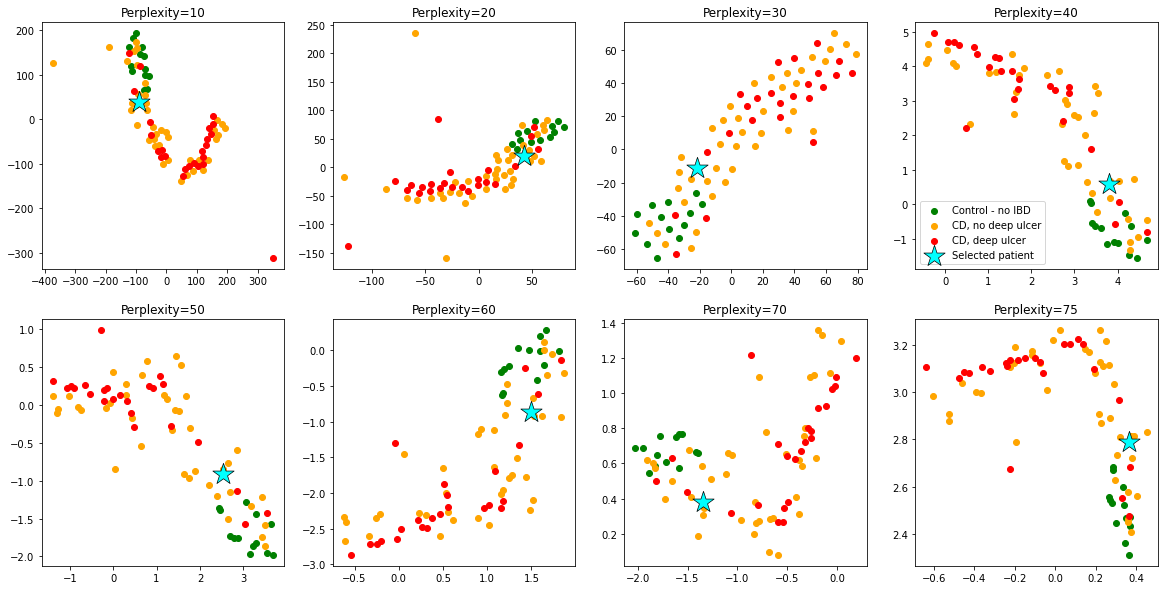

In [53]:


plot_tsne(tsne_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 120 genes

In [54]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


In [55]:

# selected_patient = tsne_dataset.loc[tsne_dataset.index.str.startswith(pid)]
# selected_patient

In [56]:
with open("most_diff_genes_115", "rb") as fp:   # Unpickling
    most_diff_genes = pickle.load(fp)

most_diff_genes

['FDCSP', 'FNDC4', 'JKAMP', 'RUFY4']

In [57]:
test_set = modify_expression(pid, most_diff_genes, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


## Re-encoding the dataset

In [58]:
tsne_dataset = encode_dataset(encoder, test_set)
tsne_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,2.032309,-5.135555,1.631054,3.089864,-0.130211,1.283602,1.409903,-0.000868,-1.457192,0.391495,...,-0.214097,2.967697,1.526739,2.786917,8.452328,-0.794451,1.746855,5.542357,2.547924,7.801789
105_CD_plain,2.576689,-2.340752,0.555628,0.613485,1.678985,0.318563,0.406789,1.376645,-0.395139,-0.791841,...,-0.344940,1.488305,0.435154,-0.177925,3.366642,-1.392990,1.068992,3.780588,2.048558,2.499993
2_CD_plain,-6.054844,2.469419,0.006588,5.369420,-2.754896,-0.186449,-0.318684,-2.523620,3.494761,4.088428,...,-0.468243,-5.724041,5.221141,4.328642,-8.917670,6.238849,-1.733903,-8.196208,-4.708192,1.058727
184_CD_plain,0.687100,0.524452,0.269079,-2.052216,0.444426,-0.840710,-0.785240,0.981180,-0.338528,-1.283728,...,0.616811,0.678319,-0.455934,-1.772873,-1.381696,-0.739447,-0.837508,1.542518,0.079764,-2.338043
312_CD_plain,-0.094131,-0.576040,1.251028,-0.192213,-0.912040,0.211954,-0.935722,0.105053,-0.823305,-0.700169,...,0.691425,1.502194,0.730477,0.222934,1.692135,-0.627146,0.753498,0.908899,0.217039,0.918757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,-0.692460,0.563372,1.358234,-0.532380,-0.864549,0.263345,-0.669010,0.024876,0.254361,0.342033,...,0.674746,1.629165,0.967041,0.651328,2.133363,-0.493894,0.755310,0.137140,0.194016,1.777632
279_CD_plain,-5.111883,3.060499,0.330828,4.150625,-1.680177,0.798668,-0.645254,-2.560623,1.637389,3.765302,...,-0.231179,-4.290086,4.050075,5.392345,-6.340455,5.593947,2.031589,-8.215998,-3.556630,2.185153
179_CD_plain,0.475798,-0.982805,1.504499,0.194518,-0.596799,0.415968,-0.858169,0.237164,-0.880746,-0.611315,...,0.158961,2.484211,1.018860,0.139997,3.362733,-1.407725,0.593724,1.642781,-0.040300,1.737715


## Replot tSNE

dataset size: (78, 32)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\s

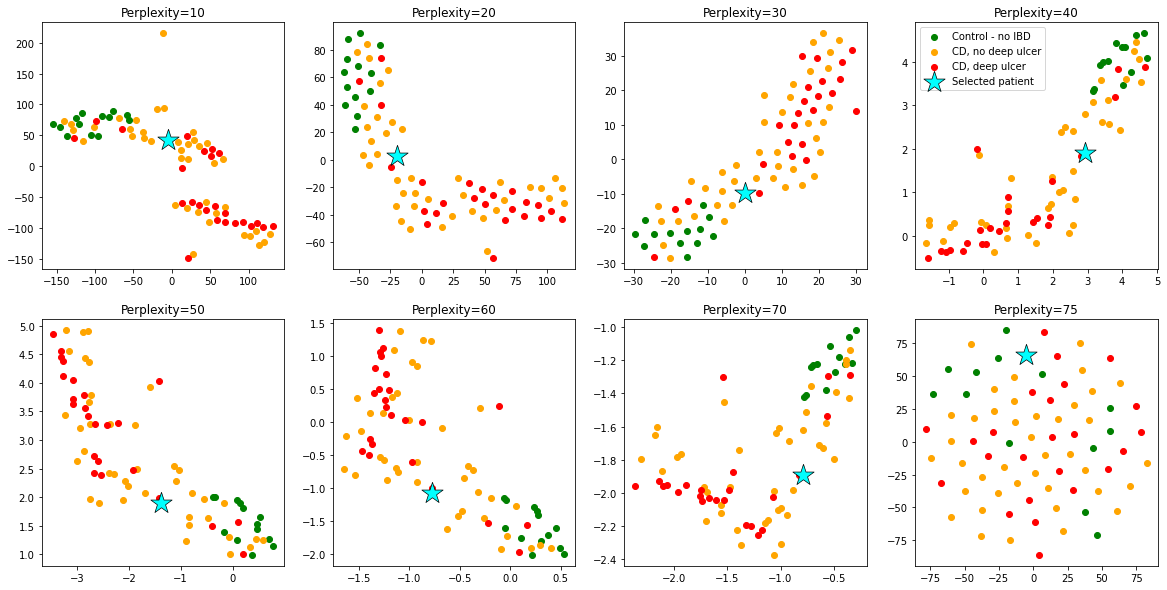

In [59]:


plot_tsne(tsne_dataset, selected_patient_idx)

Patient moves into the control cluster